In [ ]:
import os
import zipfile

# Create the datasets directory if it doesn't exist
if not os.path.exists('dataset'):
    os.makedirs('dataset')

# Download the dataset using Kaggle API
!kaggle datasets download -d grassknoted/asl-alphabet -p dataset

# Extract the dataset
with zipfile.ZipFile('dataset/asl-alphabet.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

print("Dataset downloaded and extracted to 'dataset' directory.")

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset downloaded and extracted to 'dataset' directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set(style="whitegrid")

import os
import glob as gb
import torch
from torchvision import transforms
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision
from torch import nn
from torchsummary import summary
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, random_split


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import random
import os
from tqdm import tqdm
import cv2
import random
from sklearn.model_selection import train_test_split
import gc
import matplotlib.image as mpimg


In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# Paths to your training and testing data
data_dir = '/content/dataset/asl_alphabet_train/asl_alphabet_train'
Val_dir = '/content/dataset/asl_alphabet_train'

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Load the dataset using ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [ ]:
# Get class names
class_names = dataset.classes
num_classes = len(class_names)
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [ ]:
# Define the ratio for train/test split
train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size

In [ ]:
# Split the dataset into training and testing sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [ ]:
# Get the number of samples in each set
num_train_samples = len(train_dataset)
num_test_samples = len(test_dataset)

print(f'Number of training samples: {num_train_samples}')
print(f'Number of testing samples: {num_test_samples}')

Number of training samples: 69600
Number of testing samples: 17400


In [ ]:
num_classes = len(dataset.classes)
num_classes

29

In [ ]:
# Create DataLoaders for training and testing sets
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

In [ ]:
# Example of iterating over the training data
for images, labels in train_loader:
    # Your training code here
    print(images.shape, labels.shape)
    break

# Example of iterating over the testing data
for images, labels in test_loader:
    # Your testing code here
    print(images.shape, labels.shape)
    break

torch.Size([32, 3, 200, 200]) torch.Size([32])
torch.Size([32, 3, 200, 200]) torch.Size([32])


In [ ]:
# Function to display random samples
def show_random_samples(dataset, class_names, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 15))
    for i in range(num_samples):
        random_idx = random.randint(0, len(dataset) - 1)
        img, label = dataset[random_idx]
        img = img.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C) for displaying
        axes[i].imshow(img)
        axes[i].set_title(class_names[label])
        axes[i].axis('off')
    plt.show()

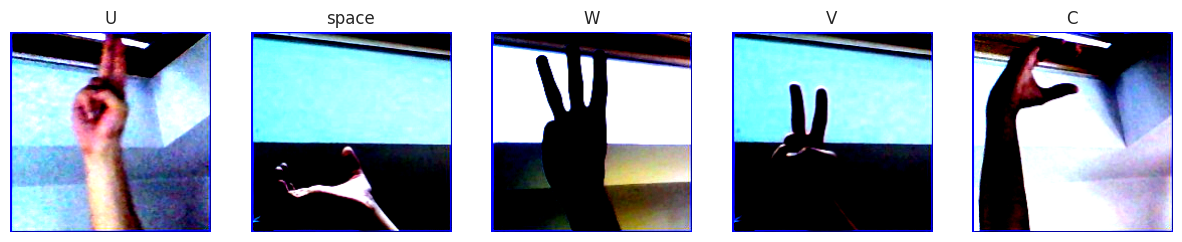

In [ ]:
# Display random samples from the training set
show_random_samples(train_dataset, class_names)

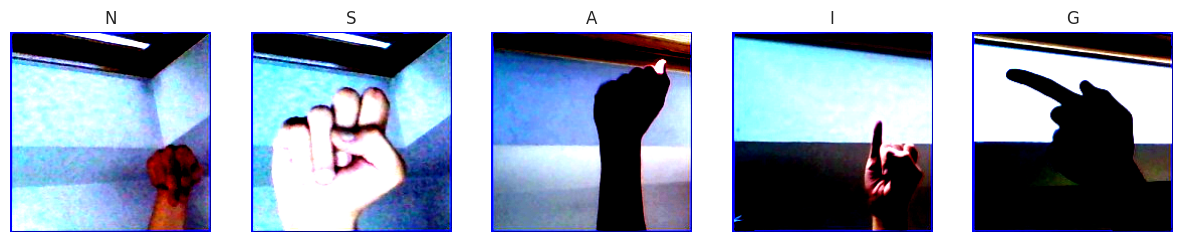

In [ ]:
# Display random samples from the testing set
show_random_samples(test_dataset, class_names)

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=29):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.fc1 = nn.Linear(128 * 23 * 23, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 23 * 23)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
# Instantiate and move the model to the GPU
my_model = SimpleCNN(num_classes=num_classes).to(device)
# Define loss function and optimizer
my_model_criterion = nn.CrossEntropyLoss()
my_model_optimizer = optim.Adam(my_model.parameters(), lr=0.001)

In [ ]:
summary(my_model, input_size=(3, 200, 200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 198, 198]             896
         MaxPool2d-2           [-1, 32, 99, 99]               0
            Conv2d-3           [-1, 64, 97, 97]          18,496
         MaxPool2d-4           [-1, 64, 48, 48]               0
            Conv2d-5          [-1, 128, 46, 46]          73,856
         MaxPool2d-6          [-1, 128, 23, 23]               0
            Linear-7                  [-1, 512]      34,669,056
           Dropout-8                  [-1, 512]               0
            Linear-9                   [-1, 29]          14,877
Total params: 34,777,181
Trainable params: 34,777,181
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 20.27
Params size (MB): 132.66
Estimated Total Size (MB): 153.40
--------------------------------

In [ ]:
# Training loop
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * inputs.size(0)
        epoch_loss /= len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
    return epoch_loss

In [ ]:
# Train the model
my_model_loss=train_model(my_model, train_loader, my_model_criterion, my_model_optimizer, device, num_epochs=10)

Epoch 1/10, Loss: 0.7932
Epoch 2/10, Loss: 0.1869
Epoch 3/10, Loss: 0.1182
Epoch 4/10, Loss: 0.0863
Epoch 5/10, Loss: 0.0720
Epoch 6/10, Loss: 0.0598
Epoch 7/10, Loss: 0.0562
Epoch 8/10, Loss: 0.0518
Epoch 9/10, Loss: 0.0408
Epoch 10/10, Loss: 0.0415


In [ ]:
torch.save(my_model, 'ASL_my_model_V1.0.1.pth')

In [ ]:
def test_model(model, test_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy


In [ ]:
# Test the model
my_model_accuracy=test_model(my_model, test_loader, my_model_criterion, device)

Test Accuracy: 99.30%


In [ ]:
# if you need load saved model use this
MyModel = SimpleCNN()  # Define your model
MyModel = torch.load('/content/ASL_my_model_V1.0.1.pth')
MyModel = MyModel.to(device)

In [ ]:
def predict_and_display_image(model, image_path, transform, device):
    # Load the image
    image = Image.open(image_path).convert('RGB')

    # Preprocess the image
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Set the model to evaluation mode
    model.eval()

    with torch.no_grad():
        # Make a prediction
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_names[predicted.item()]

    # Display the image and prediction
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

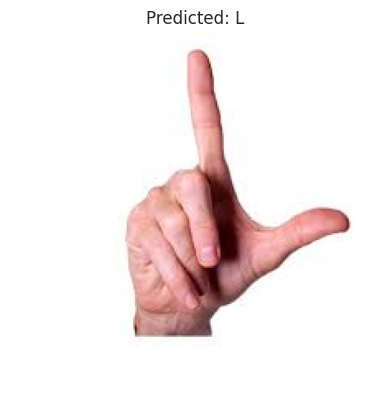

In [ ]:
image_path = '/content/images (10).jfif'
predict_and_display_image(my_model, image_path, transform, device)